# Projet 1 : Telecom Users dataset

#### Source des données :  https://www.kaggle.com/radmirzosimov/telecom-users-dataset

# Objectif : 
### A partir d'un fichier clients d'un opérateur téléphonique, créer un modèle prédictif capable d'identifier les clients prêts à partir vers la concurrence afin de leur proposer une offre sur-mesure pour qu'ils restent clients.

# Sommaire :

1. Chargement et nettoyage des données
    1. Importation des librairies
    2. Chargement du dataset
    3. Nettoyage du dataset
        1. Suppression des colonnes inutiles
        2. Ajustement de la typologie des données
        3. Détection et correction des éventuelles valeurs manquantes
2. Préparation des données pour la modélisation
    1. Détection des points atypiques
    2. Homogénéisation de l'échelle des données
    3. Numérisation des données
    4. Détection d'un éventuel biais de surreprésentation de l'une des 2 classes
    5. Division du dataset
        1. Mélange aléatoire des exemples
        2. Définition des différents sets de données
        3. Séparation des inputs (X) et outputs (Y)
3. Implémentation de l'algorithme de Machine Learning
    1. Création du modèle initial avec l'API Sequential
    2. Compilation et entraînement du modèle initial
    3. Optimisation du modèle :
        1. Diagnostic initial
        2. Optimisation des hyperparamètres : taux d'apprentissage, architecture, optimiseur, initialisation, régularisation

# 1. Chargement et nettoyage des données

## A. Importation des Librairies :

In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt   
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
%matplotlib inline     
sns.set(color_codes=True)

## B. Chargement du dataset :

In [2]:
df = pd.read_csv("telecom_users.csv")
# To display the top 5 rows 
df.head(5) 

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Chaque colonne contient les informations suivantes :

- customerID : customer id
- gender : client gender (male / female)
- SeniorCitizen : is the client retired (1, 0)
- Partner : is the client married (Yes, No)
- Dependents : [pas d'informations sur cette donnée]
- tenure : how many months a person has been a client of the company
- PhoneService : is the telephone service connected (Yes, No)
- MultipleLines : are multiple phone lines connected (Yes, No, No phone service)
- InternetService : client's Internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : is the online security service connected (Yes, No, No internet service)
- OnlineBackup : is the online backup service activated (Yes, No, No internet service)
- DeviceProtection : does the client have equipment insurance (Yes, No, No internet service)
- TechSupport : is the technical support service connected (Yes, No, No internet service)
- StreamingTV : is the streaming TV service connected (Yes, No, No internet service)
- StreamingMovies : is the streaming cinema service activated (Yes, No, No internet service)
- Contract : type of customer contract (Month-to-month, One year, Two year)
- PaperlessBilling : whether the client uses paperless billing (Yes, No)
- PaymentMethod : payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : current monthly payment
- TotalCharges : the total amount that the client paid for the services for the entire time
- Churn : whether there was a churn (Yes or No)

## C. Nettoyage du dataset

### a. Suppression des colonnes inutiles

L'objectif étant d'utiliser ces données pour créer un modèle prédictif, on peut commencer par nettoyer ce dataset en enlevant les données dont on est sûr qu'elles n'auront aucune influence sur le fait que le client reste ou part chez la concurrence : ici, les deux premières colonnes "Unnamed: 0" et "customerID" :

In [3]:
df = df.drop('Unnamed: 0', axis = 1)

In [4]:
df = df.drop('customerID', axis = 1)

Notre dataset ressemble désormais à cela :

In [5]:
df.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


### b. Ajustement de la typologie des données

L'étape suivante consiste à vérifier le type de chaque donnée du dataset afin de vérifier que les données numériques ne soient pas enregistrer comme des chaînes de caractères et les convertir en nombres si ce n'est pas le cas afin de pouvoir les utiliser de façon optimale par la suite :

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

On voit ici que la colonne 'TotalCharges' contient des valeurs numériques enregistrées comme 'object'. La cause de cette typologie étant probablement liée à certains des éléments contenus manquants ou ne pouvant être interprétés directement comme des nombres, on cherche en premier lieu à évaluer combien d'éléments de la colonne semblent poser problème :

In [7]:
L_errors=[]
for i in range(len(df['TotalCharges'])):
    try:
        float(df['TotalCharges'][i])
    except:
        L_errors.append(i)
print('Indices des éléments non convertibles directement en nombres : ',L_errors)
print('Il y a ',len(L_errors), "erreurs sur l'ensemble des",len(df['TotalCharges']),"éléments de cette colonne soit ",100*len(L_errors)/len(df['TotalCharges']),"% d'erreurs")

Indices des éléments non convertibles directement en nombres :  [356, 634, 2771, 3086, 3255, 4326, 5375, 5382, 5695, 5951]
Il y a  10 erreurs sur l'ensemble des 5986 éléments de cette colonne soit  0.1670564650851988 % d'erreurs


La proportion d'éléments posant problème étant ici très faible, on va tout simplement s'en passer pour construire notre modèle en éliminant les lignes correspondantes dans l'intégralité du dataset :

In [8]:
df=df.drop(L_errors)

Vérification du nouveau nombre d'exemples (de lignes) :

In [9]:
len(df)

5976

Vérification et conversion des éléments de 'TotalCharges' en valeurs numériques de type 'float' :

In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [11]:
df['TotalCharges'].dtypes

dtype('float64')

### c. Détection et correction éventuelle de valeurs manquantes

Vérification de l'éventuelle présence de valeurs manquantes dans l'ensemble des colonnes :

In [12]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# 2. Préparation des données pour la modélisation :

## A. Détection des points atypiques :

Afin de développer un modèle prédictif efficace, on va chercher d'éventuels points atypiques dans les données pour réduire leur impact sur l'entraînement de l'algorithme; en les retirant ou en les moyennant.

Visualisation avec boxplot :

<AxesSubplot:xlabel='TotalCharges'>

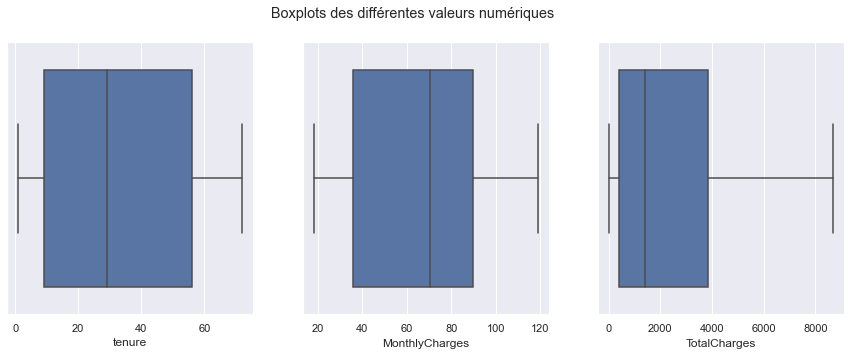

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Boxplots des différentes valeurs numériques')

sns.boxplot(ax=axes[0],x=df['tenure'])

sns.boxplot(ax=axes[1],x=df['MonthlyCharges'])

sns.boxplot(ax=axes[2],x=df['TotalCharges'])


Aucun point atypique n'est directement mis en avant dans chacun de ces graphes. Cependant on peut remarquer que la distribution des TotalCharges laisse entrevoir une grande disparité entre la majorité des valeurs et la valeur maximale. Pour évaluer si les valeurs maximales semblent particulièrement atypiques par rapport au reste des valeurs, on va ici tracer un nuage de points :

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalCharges', ylabel='index'>

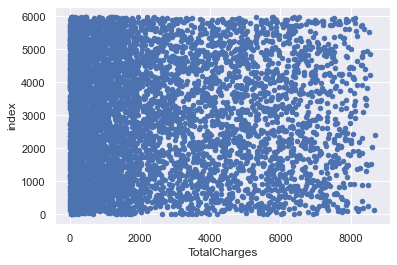

In [14]:
df.reset_index().plot(kind='scatter', x='TotalCharges', y='index')

Le nuage de points ne présente pas de valeurs particulièrement atypiques par rapport au reste, la densité de valeurs semble logiquement diminuer avec l'augmentation de 'TotalCharges' sans que certaines valeurs se retrouvent carrément isolées par rapport aux autres. Aucun point atypique compromettant l'efficacité d'un modèle prédictif n'a ainsi été détecté.

## B. Homogénéisation de l'échelle des données

Cette étape consiste à mettre à la même échelle l'ensemble des données numériques ('tenure','MonthlyCharges' et 'TotalCharges') afin de réduire le temps de convergence de la phase d'apprentissage de notre algorithme prédictif. Pour chacune de ces colonne, on va utiliser une normalisation classique en soustrayant à chaque élément la moyenne des valeurs puis en divisant cette différence par l'écart-type.

In [15]:
def standardisation(dataframe,nom_colonne):
    df_copy=dataframe.copy()
    df_copy[nom_colonne]=(df_copy[nom_colonne]-df_copy[nom_colonne].mean())/df_copy[nom_colonne].std()
    return(df_copy)

df_standardized=df # initialisation
df_standardized=standardisation(df,'tenure')
df_standardized=standardisation(df_standardized,'MonthlyCharges')
df_standardized=standardisation(df_standardized,'TotalCharges')    

Notre dataset ressemble désormais à cela :

In [16]:
df_standardized.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,1.611246,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),-1.353370,-0.247748,No
1,Female,0,No,No,0.468429,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0.774002,0.736608,No
2,Female,1,Yes,No,0.223539,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0.335574,0.251432,Yes
3,Male,0,No,No,-1.164167,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,-0.297157,-0.905649,No
4,Male,0,No,No,-1.245797,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,-0.378532,-0.957977,No


## C. Numérisation des valeurs

Afin que l'ensemble des colonnes puissent être exploitées par notre algorithme, nous allons transformées les données textuelles du dataset en données numériques selon l'ensemble des valeurs possibles pour chaque colonne :

| Colonne correspondante | Valeurs actuelles possibles (texte) | Valeurs transformées respectives (numérique) |
| :-: | :-: | :-: |
| gender | Male / Female | 0 / 1 | 
| partner | No / Yes | 0 / 1 |
| Dependents | No / Yes | 0 / 1 |
| PhoneService | No / Yes | 0 / 1 |
| MultipleLines | No / Yes / No phone service | 0 / 1 / 2 |
| InternetService | No / DSL / Fiber optic | 0 / 1 / 2 |
| OnlineSecurity | No / Yes / No internet service | 0 / 1 / 2 |
| OnlineBackup | No / Yes / No internet service | 0 / 1 / 2 |
| DeviceProtection | No / Yes / No internet service | 0 / 1 / 2 |
| TechSupport | No / Yes / No internet service | 0 / 1 / 2 |
| StreamingTV | No / Yes / No internet service | 0 / 1 / 2 |
| StreamingMovies | No / Yes / No internet service | 0 / 1 / 2 |
| Contract | Month-to-month / One year / Two year | 0 / 1 / 2 |
| PaperlessBilling | No / Yes | 0 / 1 |
| PaymentMethod | Electronic check / Mailed check / Bank transfer (automatic) / Credit card (automatic) | 0 / 1 / 2 / 3 |
| Churn | No / Yes | 0 / 1 |

In [17]:
# Création d'une copie de df :
df_2=df_standardized

df_2.head()

# Remplacement des valeurs de chaque colonne avec la méthode replace() de Pandas :

df_2['gender']=df_2['gender'].replace(['Male','Female'],[0,1])
df_2['Partner']=df_2['Partner'].replace(['No','Yes'],[0,1])
df_2['Dependents']=df_2['Dependents'].replace(['No','Yes'],[0,1])
df_2['PhoneService']=df_2['PhoneService'].replace(['No','Yes'],[0,1])
df_2['MultipleLines']=df_2['MultipleLines'].replace(['No','Yes','No phone service'],[0,1,2])
df_2['InternetService']=df_2['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2])
df_2['OnlineSecurity']=df_2['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,2])
df_2['OnlineBackup']=df_2['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,2])
df_2['DeviceProtection']=df_2['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,2])
df_2['TechSupport']=df_2['TechSupport'].replace(['No','Yes','No internet service'],[0,1,2])
df_2['StreamingTV']=df_2['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,2])
df_2['StreamingMovies']=df_2['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,2])
df_2['Contract']=df_2['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2])
df_2['PaperlessBilling']=df_2['PaperlessBilling'].replace(['No','Yes'],[0,1])
df_2['PaymentMethod']=df_2['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3])
df_2['Churn']=df_2['Churn'].replace(['No','Yes'],[0,1])

df_2.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,1.611246,1,1,0,2,2,2,2,2,2,2,0,3,-1.353370,-0.247748,0
1,1,0,0,0,0.468429,1,0,2,0,1,1,0,1,0,0,1,3,0.774002,0.736608,0
2,1,1,1,0,0.223539,1,1,2,0,0,0,0,0,0,0,1,2,0.335574,0.251432,1
3,0,0,0,0,-1.164167,1,0,1,0,0,0,0,0,1,0,1,0,-0.297157,-0.905649,0
4,0,0,0,0,-1.245797,1,0,1,1,0,1,0,0,0,0,0,0,-0.378532,-0.957977,0
5,1,0,1,0,1.529616,0,2,1,1,0,1,1,0,1,2,1,2,-0.498103,0.471451,0
6,1,0,0,0,0.019465,1,1,2,1,0,0,0,0,1,0,1,0,0.857037,0.304090,0
7,1,0,0,0,-1.286612,0,2,1,0,0,0,0,0,0,0,1,1,-1.326799,-0.999575,0
8,0,0,0,0,0.264354,0,2,1,0,0,1,1,0,0,1,0,1,-0.973067,-0.434853,0
9,0,1,0,0,0.917393,1,1,2,1,1,1,1,1,1,0,1,0,1.715625,1.796069,0


In [18]:
# Assignation à df après vérification sur df_2 de la conformité
df=df_2
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,1.611246,1,1,0,2,2,2,2,2,2,2,0,3,-1.353370,-0.247748,0
1,1,0,0,0,0.468429,1,0,2,0,1,1,0,1,0,0,1,3,0.774002,0.736608,0
2,1,1,1,0,0.223539,1,1,2,0,0,0,0,0,0,0,1,2,0.335574,0.251432,1
3,0,0,0,0,-1.164167,1,0,1,0,0,0,0,0,1,0,1,0,-0.297157,-0.905649,0
4,0,0,0,0,-1.245797,1,0,1,1,0,1,0,0,0,0,0,0,-0.378532,-0.957977,0
5,1,0,1,0,1.529616,0,2,1,1,0,1,1,0,1,2,1,2,-0.498103,0.471451,0
6,1,0,0,0,0.019465,1,1,2,1,0,0,0,0,1,0,1,0,0.857037,0.304090,0
7,1,0,0,0,-1.286612,0,2,1,0,0,0,0,0,0,0,1,1,-1.326799,-0.999575,0
8,0,0,0,0,0.264354,0,2,1,0,0,1,1,0,0,1,0,1,-0.973067,-0.434853,0
9,0,1,0,0,0.917393,1,1,2,1,1,1,1,1,1,0,1,0,1.715625,1.796069,0


## D. Détection d'un éventuel biais de surreprésentation de l'une des 2 classes

Si l'une des 2 classes que l'on cherche à prédire est sur-représentée par rapport à l'autre, l'algorithme peut tendre à choisir systématiquement celle en sur-nombre, ce qui limiterait potentiellement ses performances.
Pour vérifier qu'il n'y a pas de sur-représentation de l'une des classes il suffit de s'en assurer avec un histogramme :

(array([4389., 1587.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

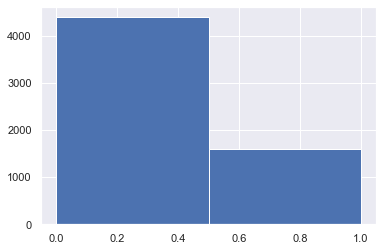

In [19]:
plt.hist(df['Churn'],bins=2)

Il y a environ 3 fois plus dans l'une des classes que dans l'autre; ce qui correspond à une sur-représentation non-négligeable.
Il faudra alors s'assurer au moins d'un mélange aléatoire des exemples avant l'entraînement du modèle.

## E.  Division du dataset

### a. Mélange aléatoire des exemples

In [20]:
df_shuffled=df.sample(frac=1).reset_index(drop=True) # sans argument seed
df=df_shuffled
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,1.080652,1,1,0,2,2,2,2,2,2,2,0,0,-1.341745,-0.353965,0
1,0,0,0,0,-0.551944,0,2,1,0,0,1,0,1,0,0,1,0,-0.836889,-0.688049,1
2,0,0,0,1,0.264354,1,1,0,2,2,2,2,2,2,1,0,2,-1.308531,-0.589066,0
3,1,1,1,0,-0.511129,1,0,2,0,0,0,0,1,1,1,1,2,0.868662,-0.192848,0
4,1,0,0,0,-0.143795,1,1,2,0,0,0,0,0,0,0,1,0,0.310663,-0.134034,0
5,0,0,0,1,0.345984,1,0,2,1,1,1,1,1,1,2,1,0,1.537929,0.971401,0
6,1,0,0,0,-0.307054,1,0,1,1,1,1,1,1,0,1,0,1,0.313985,-0.190957,1
7,0,0,0,0,-0.307054,1,1,1,1,1,1,1,0,1,0,0,2,0.561431,-0.118402,0
8,0,0,1,0,1.162282,1,1,2,0,0,0,0,1,1,1,1,2,1.051340,1.484367,0
9,1,0,1,0,0.345984,1,0,0,2,2,2,2,2,2,2,0,3,-1.467959,-0.625519,0


### b. Définition des différents sets de données

Afin d'entraîner un modèle prédictif et de l'optimiser, nous allons séparer le dataset en plusieurs parties : un 'training set' qui va contenir environ 80% des exemples (4782), un 'dev set' qui va contenir 10% des exemples (597) et un 'test set' qui va lui aussi contenir 10% des exemples (soit 597 également).

Le modèle sera ainsi entraîné en utilisé le 'training set', puis il sera optimisé en fonction des résultats obtenus sur le 'dev set' pour enfin être testé sur le 'test set'.

In [21]:
training_set=df[0:4782]
dev_set=df[4782:5379]
test_set=df[5379:5976]

print("Nombre d'exemples dans le training set : ",len(training_set))
print("Nombre d'exemples dans le dev set : ",len(dev_set))
print("Nombre d'exemples dans le test set : ",len(test_set))

Nombre d'exemples dans le training set :  4782
Nombre d'exemples dans le dev set :  597
Nombre d'exemples dans le test set :  597


### c. Séparation des inputs (X) et outputs (Y)

In [22]:
# Training set :
X_train=np.asarray(training_set.iloc[:,0:19])
print("Dimensions de X_train : ",X_train.shape)

Y_train=np.asarray(training_set.iloc[:,19])
Y_train=Y_train.reshape(len(Y_train),1)
print("Dimensions de Y_train : ",Y_train.shape)

# Dev set :

X_dev=np.asarray(dev_set.iloc[:,0:19])
print("Dimensions de X_dev : ",X_dev.shape)

Y_dev=np.asarray(dev_set.iloc[:,19])
Y_dev=Y_dev.reshape(len(Y_dev),1)
print("Dimensions de Y_dev : ",Y_dev.shape)

# Test set :

X_test=np.asarray(test_set.iloc[:,0:19])
print("Dimensions de X_test : ",X_test.shape)

Y_test=np.asarray(test_set.iloc[:,19])
Y_test=Y_test.reshape(len(Y_test),1)
print("Dimensions de Y_test : ",Y_test.shape)

Dimensions de X_train :  (4782, 19)
Dimensions de Y_train :  (4782, 1)
Dimensions de X_dev :  (597, 19)
Dimensions de Y_dev :  (597, 1)
Dimensions de X_test :  (597, 19)
Dimensions de Y_test :  (597, 1)


# 3. Implémentation de l'algorithme de Machine Learning

Etant confronté à un problème de classification à 19 variables avec à disposition un training set contenant plusieurs milliers d'exemples, je choisis ici d'implémenter un premier modèle relativement simple de type réseau de neurones avec Keras.

L'architecture initialement choisie est celle d'un réseau de neurones comportant une seule couche cachée de 25 neurones; la couche d'entrée comportant 19 unités et celle de sortie une seule.

A noter l'utilisation d'une fonction d'activation de type sigmoïde en couche de sortie pour répondre à ce problème de classification binaire.


## A. Création du modèle initial avec l'API Sequential

In [23]:
# Création du modèle :
model=keras.models.Sequential()
# Ajout de la couche cachée :
model.add(keras.layers.Dense(25,input_dim=19,activation="relu"))
# Ajout de la couche de sortie :
model.add(keras.layers.Dense(1,activation="sigmoid"))

# Affichage des caractéristiques de chaque couche :
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                500       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 526
Trainable params: 526
Non-trainable params: 0
_________________________________________________________________


## B. Compilation du modèle

On présice ici la fonction de perte et l'optimiseur que l'on va utiliser sur ce modèle. 
Le problème étant une classification binaire, nous allons utiliser la fonction de perte "binary_crossentropy".
Pour l'optimiseur, on va commencer ici avec un optimiseur simple de type descente de gradient stochastique ("sgd"). A noter que le taux d'apprentissage est ici implémenté par défaut comme étant égal à 0.01.

In [24]:
model.compile(loss="binary_crossentropy",optimizer="SGD",metrics=["accuracy"])

## C. Entraînement du modèle initial

In [25]:
history=model.fit(X_train,Y_train,epochs=100,validation_data=(X_dev,Y_dev))

Epoch 1/100
150/150 [==============================] - 1s 4ms/step - loss: 0.5443 - accuracy: 0.7120 - val_loss: 0.4906 - val_accuracy: 0.7253
Epoch 2/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.7631 - val_loss: 0.4597 - val_accuracy: 0.7755
Epoch 3/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.7875 - val_loss: 0.4500 - val_accuracy: 0.7923
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7875 - val_loss: 0.4472 - val_accuracy: 0.7889
Epoch 5/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7932 - val_loss: 0.4450 - val_accuracy: 0.7906
Epoch 6/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7949 - val_loss: 0.4432 - val_accuracy: 0.7956
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7963 - val_loss: 0.4418 - val_accuracy: 0.7956

## D. Optimisation du modèle

### a. Diagnostic initial

Ce premier modèle initial montre un taux de réussite proche de 80% sur le training set et un taux semblable sur le dev set. Il n'y a donc pas a priori de surajustement sur le training set, on va donc commencer par essayer de complexifier le modèle pour essayer de réduire le biais. 

Durant ces essais d'optimisation, on va également tester différents types de fonction d'optimisation ainsi que différentes méthodes d'initialisation des paramètres du réseau de neurones.

Enfin, on cherchera à obtenir les meilleurs résultats sur le dev set (dataset de validation sur lequel le modèle ne se sera pas entraîné), notamment en ajustant le taux d'apprentissage.

### b. Optimisation des hyperparamètres : optimiseur, initialisation, architecture, taux d'apprentissage

Itérations des essais d'optimisation :

Méthodologie :
- Optimisation itérative après chaque essai. 
- Un essai comprend 3 phases d'apprentissages sur 500 epochs avec ajustement du taux d'apprentissage entre chaque phase.
- Le résultat de l'essai retenu est celui du meilleur taux de réussite obtenu sur le dev_set.
- Le diagnostic permet d'orienter le choix de l'essai suivant en fonction de cet essai et des précédents.

1. Essais d'architecture :
    1. Couche cachée plus importante (100 neurones)
        1. Configuration : Optimizer = SGD, Initializer = Glorot ("Xavier initialization")
        2. Résultats : training_set : 79.21%, dev_set : 78.89%
        3. Diagnostic : Un peu de surajustement, moins bonnes performances
    2. Deuxième couche cachée de même taille (25 neurones)
        1. Configuration : Optimizer = SGD, Initializer = Glorot ("Xavier initialization")
        2. Résultats : training_set : 79.07%, dev_set : 78.39%
        3. Diagnostic : Performances très similaires au précédent, toujours en-dessous du modèle initial
    3. Essai d'un réseau profond : 3 couches cachées de 100 neurones chacune
        1. Configuration : Optimizer = SGD, Initializer = Glorot ("Xavier initialization")
        2. Résultats : training_set : 80.15%, dev_set : 79.90%
        3. Diagnostic : Amélioration des performances mais quiu reste similaires au modèle initial. Pas de surajustement.
    4. Essai de séparation des neurones : 2 couches cachées de 10 neurones chacune :
        1. Configuration : Optimizer = SGD, Initializer = Glorot ("Xavier initialization")
        2. Résultats : training_set : 79.07%, dev_set : 78.89%
        3. Diagnostic : Performances moins bonnes que le modèle initial et similaire aux essais 1 et 2
        
- Diagnostic post_essai 1 : Les différents essais de complexification (ou de simplification de l'architecture du réseau de neurones ne permettent pas de déterminer une architecture particulièrement plus performante que celle du modéle simple choisi initialement avec une seule couche cachée de 25 neurones. Nous poursuivons donc les essais avec cette architecture. 
        
2.  Essais de fonctions de minimisation du coût et de méthodes d'initialisation des paramètres avec un réseau simple à 1 couche cachée de 25 neurones
        1. Optimizer = SGD ("Stochastic Gradient Descent")
            1. Initializer : Glorot ("Xavier initialization")
                - Résultats : training_set : 81.60%, dev_set : 80.40%
            2. Initializer : He ("He initialization")
                - Résultats : training_set : 81.20%, dev_set : 80.07%
        2. Optimizer = Adam 
            1. Initializer : Glorot ("Xavier initialization")
                - Résultats : training_set : 83.02%, dev_set : 79.90% 
            2. Initializer : He ("He initialization")
                - Résultats : training_set : 83.10%, dev_set : 80.07%
        3. Optimizer = RMSprop
            1. Initializer : Glorot ("Xavier initialization")
                - Résultats : training_set : 81.33%, dev_set : 80.74%
            2. Initializer : He ("He initialization")
                - Résultats : training_set : 81.97%, dev_set : 82.75%

    - Diagnostic post-essai 2 : Les différentes fonctions d'optimisation ont révélé des performances différentes. La meilleure performance retenue a été effectuée avec un RMSprop combiné à une "He initialization" avec un taux de réussite maximal de 82.75% sur le dev_set (même légèrement mieux que sur le training_set à 81.97%). Si la descente de gradient stochastique ne s'est pas révélée particulièrement efficace, une optimisation de type "Adam" a quant à elle montrer les meilleurs résultats sur le training_set (83.10%) mais ayant plus de mal à généraliser sur le dev_set (80.07%). Ceci va donc nous amener à tester la performance de cette même méthode d'optimisation en appliquant une régularisation des paramètres du réseau pour limiter ce phénomène de surajustement.
    
3. Essais de régularisation des paramètres du réseau
    1. Optimizer = Adam
        1. Initializer = Glorot
            1. Régularisation = l1
                - Résultats : training_set : 81.12%, dev_set : 81.91%
            2. Régularisation = l2
                - Résultats : training_set : 81.16%, dev_set : 80.57%
            3. Régularisation = l1_l2 
                - Résultats : training_set : 80.53%, dev_set : 81.24%
        1. Initializer = He
            1. Régularisation = l1
                - Résultats : training_set : 81.79%, dev_set : 81.41%
            2. Régularisation = l2
                - Résultats : training_set : 80.91%, dev_set : 81.57%
            3. Régularisation = l1_l2 
                - Résultats : training_set : 81.11%, dev_set : 81.41%
    2. Optimizer = RMSprop
        1. Initializer = Glorot
            1. Régularisation = l1
                - Résultats : training_set : 80.89%, dev_set : 80.74%
            2. Régularisation = l2
                - Résultats : training_set : 81.35%, dev_set : 81.07%
            3. Régularisation = l1_l2 
                - Résultats : training_set : 81.47%, dev_set : 81.57%
        1. Initializer = He
            1. Régularisation = l1
                - Résultats : training_set : 80.84%, dev_set : 81.41%
            2. Régularisation = l2
                - Résultats : training_set : 81.37%, dev_set : 81.57%
            3. Régularisation = l1_l2 
                - Résultats : training_set : 80.36%, dev_set : 81.41%
            
- Diagnostic post-essai 3 : même si certains de ces modèles semblent avoir une meilleure performance que d'autres, ils présentent globalement tous un taux de réussite d'environ 81% sur le training_set et le dev_set après régularisation.


In [43]:
# Choix initializer :
initializer = keras.initializers.HeNormal()
# Choix optimizer :
opt=keras.optimizers.RMSprop(learning_rate=0.0005)
# Choix regularizer :
regularizer=keras.regularizers.l2(0.005)

# Sélection du meilleur modèle et arrêt prématuré
checkpoint_filepath = 'checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)


# Création du modèle :
model=keras.models.Sequential()
# Ajout de la 1ère couche cachée :
model.add(keras.layers.Dense(25,input_dim=19,kernel_initializer=initializer,kernel_regularizer=regularizer,bias_regularizer=regularizer,activation="relu"))
# Ajout de la couche de sortie :
model.add(keras.layers.Dense(1,activation="sigmoid"))

# Compilation du modèle :
model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])

# Entraînement du modèle :
history=model.fit(X_train,Y_train,epochs=500,callbacks=[model_checkpoint_callback],validation_data=(X_dev,Y_dev))

# Chargement du meilleur modèle :
model.load_weights(checkpoint_filepath)
# Evaluation sur le training_set :
print("Evaluation sur le training_set : ")
model.evaluate(X_train,Y_train)
print("Evaluation sur le dev_set : ")
model.evaluate(X_dev,Y_dev)
print("Evaluation sur le test_set : ")
model.evaluate(X_test,Y_test)

Epoch 1/500
150/150 [==============================] - 0s 2ms/step - loss: 0.7490 - accuracy: 0.7434 - val_loss: 0.6773 - val_accuracy: 0.7889
Epoch 2/500
150/150 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.7800 - val_loss: 0.6257 - val_accuracy: 0.7940
Epoch 3/500
150/150 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.7861 - val_loss: 0.5937 - val_accuracy: 0.7956
Epoch 4/500
150/150 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.7875 - val_loss: 0.5730 - val_accuracy: 0.7822
Epoch 5/500
150/150 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.7913 - val_loss: 0.5512 - val_accuracy: 0.7906
Epoch 6/500
150/150 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.7928 - val_loss: 0.5365 - val_accuracy: 0.7956
Epoch 7/500
150/150 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7919 - val_loss: 0.5227 - val_accuracy: 0.7973

[0.41773900389671326, 0.7956448793411255]

In [44]:
### Paramétrage model2

# Choix initializer :
initializer2 = keras.initializers.HeNormal()
# Choix optimizer :
opt2=keras.optimizers.RMSprop(learning_rate=0.0005)
# Choix regularizer :
regularizer2=keras.regularizers.l2(0.01)

# Sélection du meilleur modèle et arrêt prématuré
checkpoint_filepath2 = 'checkpoints'
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath2,save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)


# Création du modèle :
model2=keras.models.Sequential()
# Ajout de la 1ère couche cachée :
model2.add(keras.layers.Dense(25,input_dim=19,kernel_initializer=initializer2,kernel_regularizer=regularizer2,bias_regularizer=regularizer2,activation="relu"))
# Ajout de la couche de sortie :
model2.add(keras.layers.Dense(1,activation="sigmoid"))

# Compilation du modèle :
model2.compile(loss="binary_crossentropy",optimizer=opt2,metrics=["accuracy"])


# Itérations de recherche des meilleurs paramètres :
S=[]
score_to_compare=0
for i in range(5): # 5 itérations de recherche
    history=model.fit(X_train,Y_train,epochs=1000,callbacks=[model_checkpoint_callback],validation_data=(X_dev,Y_dev))
    model.load_weights(checkpoint_filepath)
    blue=model.evaluate(X_dev,Y_dev)
    S.append(blue)
    if blue[1]>score_to_compare:
        model2.load_weights(checkpoint_filepath)
        score_to_compare=blue[1]

# Scores successifs obtenus :
print(S)

# Evaluation du meilleur modèle obtenu :
print("Evaluation sur le training_set : ")
model2.evaluate(X_train,Y_train)
print("Evaluation sur le dev_set : ")
model2.evaluate(X_dev,Y_dev)
print("Evaluation sur le test_set : ")
model2.evaluate(X_test,Y_test)

Epoch 1/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8145 - val_loss: 0.4491 - val_accuracy: 0.8023
Epoch 2/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8124 - val_loss: 0.4483 - val_accuracy: 0.7990
Epoch 3/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8145 - val_loss: 0.4450 - val_accuracy: 0.8023
Epoch 4/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8143 - val_loss: 0.4578 - val_accuracy: 0.7923
Epoch 5/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.8145 - val_loss: 0.4484 - val_accuracy: 0.7990
Epoch 6/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8164 - val_loss: 0.4540 - val_accuracy: 0.7906
Epoch 7/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.8110 - val_loss: 0.4451 - val_accuracy:

[0.4290260374546051, 0.7939698696136475]

Le modèle finalement retenu obtient les performances suivantes : 
- 82.39% sur le training_set
- 81.91% sur le dev_set
- 79.40% sur le test_set

Même si la régularisation n'est pas complètement efficace, on a finalement obtenu de meilleurs résultats sur le dev_set en laissant notre modèle sur-ajuster un peu plus le training_set.